# Generalization Error

In [13]:
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt
import math

In [14]:
def growth_function(points, vc_dim):
    sum_list = []
    
    for i in range(vc_dim):
        a = binom(2*points, i)
        sum_list.append(a)
    sum_array = np.array(sum_list)
    output = np.sum(sum_array)
        
    return output

In [15]:
#OG VC
def vc_eps2(delta, N, dvc):
    gf = growth_function(2*N, dvc)
    eps = math.sqrt((8.0/N)*((math.log(gf))-math.log(delta/4.0)))
    return eps
def vc_2(N):
    return vc_eps2(0.05, N, 50)
vc_vec2 = np.vectorize(vc_2)

In [16]:
#rademccherPB
def rademacher_eps2(delta, N, dvc):
    gf = growth_function(N, dvc)
    eps = math.sqrt((2.0/N)*(math.log(2.0*N)+(math.log(gf)))) + math.sqrt((2.0/N) * math.log(1.0/delta)) + (1.0/N)
    return eps
def rademacher_2(N):
    return rademacher_eps2(0.05, N, 50)
rademacher_vec2 = np.vectorize(rademacher_2)

In [17]:
#Parrondo
def parrondo_eps2(delta, N, dvc):
    gf = growth_function(2*N, dvc)
    eps_range = np.arange(0.0,10, 0.0001)
    breakp = False
    eps = eps_range[0]
    for e in eps_range:
        bound = math.sqrt((1.0/N) * ((2.0*e) + math.log(6.0/delta) + (math.log(gf))))
        hold = e <= bound
        if hold == False and breakp == True:
            break
        elif hold == True:
            breakp = True
            eps = e
    return eps
def parrondo_2(N):
    return parrondo_eps2(0.05, N, 50)
parrondo_vec2 = np.vectorize(parrondo_2)

In [20]:
#devroye
def devroye_eps2(delta, N, dvc):
    gf = growth_function(N**2, dvc)
    eps_range = np.arange(0.0,10, 0.0001)
    breakp = False
    eps = eps_range[0]
    for e in eps_range: 
        bound = math.sqrt((1.0/(2.0*N))*(((4.0*e)*(1.0+e)) + math.log(4.0/delta) + ((math.log(gf)))))
        hold = e <= bound
        if hold == False and breakp == True:
            break
        elif hold == True:
            breakp = True
            eps = e
    return eps
def devroye_2(N):
    return devroye_eps2(0.05, N, 50)
devroye_vec2 = np.vectorize(devroye_2)

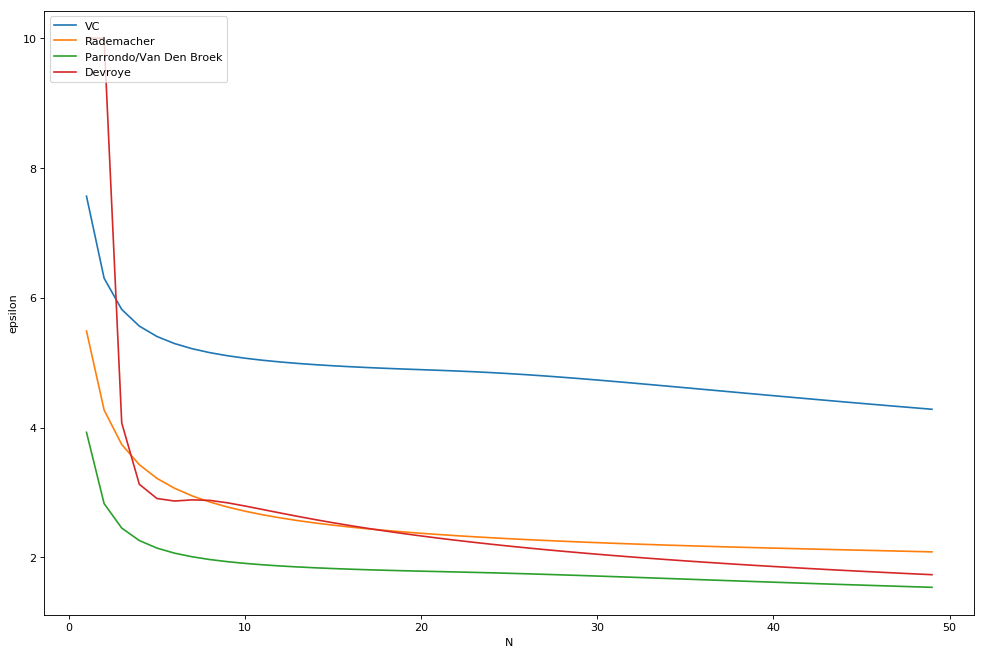

In [21]:
#prob3
prob3 = {}
prob3["N"] = np.arange(1,50,1)
prob3["ogvc"] = vc_vec2(prob3["N"])
prob3["rademccherPB"] = rademacher_vec2(prob3["N"])
prob3["Parrondo"] = parrondo_vec2(prob3["N"])
prob3["devroye"] = devroye_vec2(prob3["N"])

prob3["plot"] = plt.figure(figsize=(15,10), dpi=80)
prob3["ax"] = prob3["plot"].add_subplot(111)
prob3["ax"].set_xlabel("N")
prob3["ax"].set_ylabel("epsilon")
prob3["ax"].plot(prob3["N"], prob3["ogvc"], label="VC")
prob3["ax"].plot(prob3["N"], prob3["rademccherPB"], label="Rademacher")
prob3["ax"].plot(prob3["N"], prob3["Parrondo"], label="Parrondo/Van Den Broek")
prob3["ax"].plot(prob3["N"], prob3["devroye"], label = "Devroye")
prob3["ax"].legend(loc='upper left')

plt.show()